In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Model(nn.Module):     #Setting up the model using OOP we can put in Layers, Weight/Biases, Regularization
    def __init__(self, input_data=4, hd1=10, hd2=10, hd3=10, output=3):     #Initializing Layers
        super().__init__()                          #Call methods from a parent class(Inheritance)
        self.fc1 = nn.Linear(input_data, hd1)       #Linear function means to fully connected the input_data to hd1
        self.fc2 = nn.Linear(hd1, hd2)              #Linear function means to fully connected the hd1 to hd2
        self.fc3 = nn.Linear(hd2, hd3)              #etc
        self.fc4 = nn.Linear(hd3, output)           #The weighted sum of inputs and adding the bias happens here
    def forward(self, x):                   #This is how the neural network moves forward(Forward Pass)
        x = F.relu(self.fc1(x))             #After the output(of hd1) they apply an Activation Function(Relu)
        x = F.relu(self.fc2(x))             #The activation function is applied to the output of the layer
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [4]:
torch.manual_seed(0)    #Set a value and ensures that the randomness is the same
model = Model()         #'Turning on' the Model

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
col_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width','Type of Flower'] # Didn't have Columns
iris_df = pd.read_csv(r"/Users/thewang/Downloads/iris_dataset.csv", names=col_names, header=None )  #Loading Data
iris_df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Type of Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
iris_df['Type of Flower'].unique()      #Looking into the Type of Unique Flower in the column

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [43]:
iris_df['Type of Flower'] = iris_df['Type of Flower'].replace({
    'Iris-setosa': 0.0, 
    'Iris-versicolor': 1.0, 
    'Iris-virginica': 2.0
})                                      #Converted the Flowers to int/Floats for the Model to understand better
iris_df['Type of Flower'] = pd.to_numeric(iris_df['Type of Flower'], errors='coerce')
iris_df['Type of Flower'].unique()              #Making sure it worked

array([0., 1., 2.])

In [44]:
# We have different layers to the model, so we separate the description of the flower from the type of flower
X = iris_df.drop('Type of Flower', axis=1)  # how we have our inputs
y = iris_df['Type of Flower']         #This is the results

In [ ]:
#Converted the tabular data into Numpy Array bc pandas df doesn't work directly with tensors 
X = X.values
y = y.values
# I can skip this step and put .values, so it knows to use the values of the df 

In [45]:
from sklearn.model_selection import train_test_split # This is to randomly split the data to training and testing
#Test size is % data used for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Now converting it to Tensor and put .values in the () if it is not numpy form
X_train = torch.FloatTensor(X_train.values)  #It is easier to put them into floats bc the dataset they were floats
X_test = torch.FloatTensor(X_test.values)

In [46]:
y_train = torch.LongTensor(y_train.values)     #Converting them into Intergers 
y_test = torch.LongTensor(y_test.values)

In [47]:
#Setting up the Criterion, so we can see how far off are the prediction from the true value
criterion = nn.CrossEntropyLoss()
#(Training) Optimizer updates the model to find the minimum of the loss function using Gradient Decent
optimizer = torch.optim.Adam(model.parameters(), lr =.01) #Adam & lr * Grad. vec.= Step size to find minimum error

In [48]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=3, bias=True)
)>

In [53]:
#Training the model 
# Epoch is one run through the neural network with all the training data
epochs = 100
losses = []
#Helps trains the model over epoch amount of time
for epoch in range(epochs):
    y_pred = model.forward(X_train) #Gets Predicted Results
    # Measuring Loss (starts of high)
    loss = criterion(y_pred, y_train)       #1/n * The Sum Notation(y_train-y_pred)^2
    #Keeping track of our losses
    losses.append(loss.item())          #This is 
    # Showing me every 10 epochs(runs)
    if epoch % 10 == 0:
        print(f'Epoch: {epoch}, Loss: {loss}')
    #Now Back Propagation to help reduce the cost or loss/ Adjusts the weights and biases
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Epoch: 0, Loss: 0.04735713079571724
Epoch: 10, Loss: 0.047375038266181946
Epoch: 20, Loss: 0.04736888408660889
Epoch: 30, Loss: 0.04735695198178291
Epoch: 40, Loss: 0.04735180363059044
Epoch: 50, Loss: 0.04735187813639641
Epoch: 60, Loss: 0.04735170677304268
Epoch: 70, Loss: 0.04735017940402031
Epoch: 80, Loss: 0.04734991863369942
Epoch: 90, Loss: 0.04734939709305763


Text(0, 0.5, 'Loss/Error')

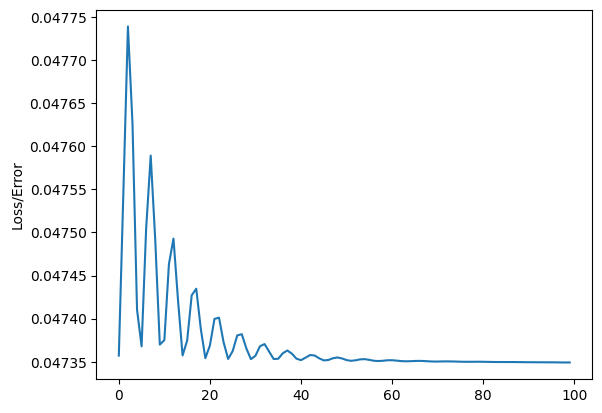

In [54]:
#Graphing the losses
plt.plot(range(epochs), losses)
plt.ylabel('Loss/Error')
